<a href="https://colab.research.google.com/github/nicollycrs/case-bombom/blob/main/Case_Bombom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case: Bombom**
Fomos abordados por um cliente que tem um processo industrial que transforma chocolate em bombons. Uma visão geral do processo é dada na Figura 1. A saída do processo, representada pela variavel PESO_BOMBOM, pode ser interpretada como o ”peso” (massa) médio do lote de bombons produzido. Além disso, temos 3 variáveis de processo: QTD CHOC,
VAR 1 e VAR 2. A única variável que podemos controlar é QTD CHOC, a quantidade de chocolate na entrada do processo. As outras duas variáveis não são controláveis por motivos diversos e não têm significado físico evidente.

---
**Processo de fabricação:**


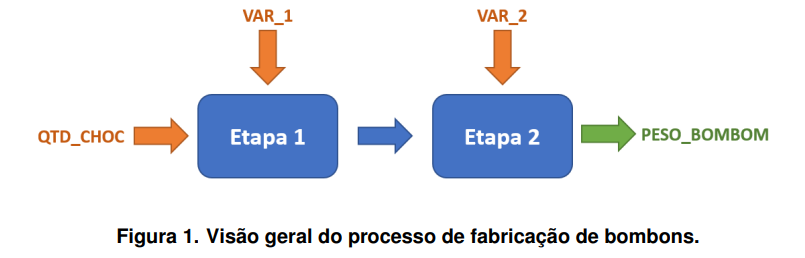

**Objetivo:** A resolucão do problema deve ser estruturada conforme as 4 etapas usuais de um projeto de Advanced Analytics: Análise Descritiva, Análise Diagnóstica, Análise Preditiva e Análise Prescritiva.


## Bibliotecas


In [ ]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25609 sha256=91b059aa6b92c014cebaf856faff6c237cd40847ff9ad27c473be12fb73d2d12
  Stored in directory: /root/.cache/pip/wheels/8e/6b/cb/628035771acab95dc84f200590b4838c7c3095a70ede67a25a
Successfully built fitter


In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import powerlaw
import statistics as stats

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import statsmodels.api as sm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [ ]:
from fitter import Fitter, get_common_distributions, get_distributions

## Preparação dos arquivos

**Conversão .xlsx para .csv** <br>
Para uma melhor manipulação dos dataset, será necessário transformá-lo em um arquivo '.csv'. Utilizando a biblioteca Pandas, o trecho de código abaixo realiza essa conversão:

In [ ]:
read_file = pd.read_excel (r'/content/bombom/registros-prod.xlsx')
read_file.to_csv (r'/content/bombom/registros-prod.csv', index = None, header=True)

In [ ]:
registros_prod = pd.read_csv('/content/bombom/registros-prod.csv')

In [ ]:
read_file = pd.read_excel (r'/content/bombom/analise-preditiva.xlsx')
read_file.to_csv (r'/content/bombom/analise-preditiva.csv', index = None, header=True)

In [ ]:
analise_preditiva = pd.read_csv('/content/bombom/analise-preditiva.csv')

In [ ]:
read_file = pd.read_excel (r'/content/bombom/analise-prescritiva.xlsx')
read_file.to_csv (r'/content/bombom/analise-prescritiva.csv', index = None, header=True)

In [ ]:
analise_prescritiva = pd.read_csv('/content/bombom/analise-prescritiva.csv')

# Análise descritiva

## Análise inicial do dataset

In [ ]:
registros_prod # Ter uma visão geral de como o dataset está montado e seus tipos de dados

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822
...,...,...,...,...
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321


In [ ]:
registros_prod.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


## Análise da variável QTD_CHOC

In [ ]:
qtd_choc = registros_prod['QTD_CHOC']

Medidas de posição (Média, Mediana, Moda)

In [ ]:
print("QTD_CHOC - Média: " + str(qtd_choc.mean()))
print("QTD_CHOC - Mediana: " + str(qtd_choc.median()))
print("QTD_CHOC - Moda: " + str(stats.mode(qtd_choc)))

QTD_CHOC - Média: 291.2646
QTD_CHOC - Mediana: 295.45000000000005
QTD_CHOC - Moda: 328.53


Medidas de Tendência não Central

* Decis

In [ ]:
qtd_choc.describe(percentiles=[.1, .2, .3, .4, .5, .6 , .7, .8, .9, 1])

count    500.000000
mean     291.264600
std       45.182499
min      112.910000
10%      231.642000
20%      249.798000
30%      267.122000
40%      281.220000
50%      295.450000
60%      306.354000
70%      319.036000
80%      332.552000
90%      345.678000
100%     436.070000
max      436.070000
Name: QTD_CHOC, dtype: float64

* Quartis e identificação de outliers

Box plot: Q1 (25% dos dados são inferiores a Q1 - o limite é a linha horizontal inferior) // Q2 (linha laranja) = mediana // Q3 (área acima da linha laranja, 25% dos dados estão acima de Q3 e acabam na linha horizontal superior)

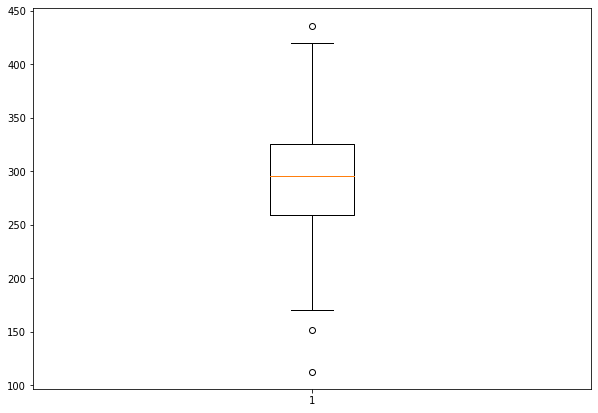

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(qtd_choc)
plt.show()

In [ ]:
fig = px.box(qtd_choc, points="all")
fig.show()

Medidas de dispersão ou variabilidade

Amplitude - representa a diferença entre o maior e o menor valor do conjunto de observações

In [ ]:
print("QTD_CHOC - Valor máximo: " + str(qtd_choc.max()))
print("QTD_CHOC - Valor mínimo: " + str(qtd_choc.min()))
print("QTD_CHOC - Amplitude: " + str(qtd_choc.max() - qtd_choc.min()))

QTD_CHOC - Valor máximo: 436.07
QTD_CHOC - Valor mínimo: 112.91
QTD_CHOC - Amplitude: 323.15999999999997


Variância - medida de dispersão dos dados em torno da média

In [ ]:
np.var(qtd_choc)

2037.3753204400002

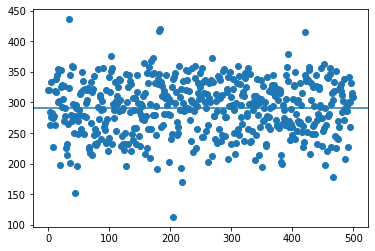

In [ ]:
plt.scatter(registros_prod.index, registros_prod.QTD_CHOC)
plt.axhline(y=np.nanmean(registros_prod.QTD_CHOC))

In [ ]:
fig = px.scatter(registros_prod['QTD_CHOC'])

fig.show()

Desvio padrão

In [ ]:
stats.stdev(qtd_choc)

45.182499232709866

Medidas de assimetria e curtose

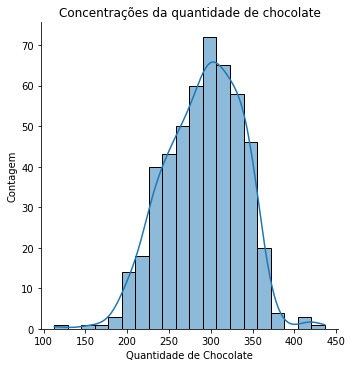

In [ ]:
sns.displot(qtd_choc, kde=True).set(title='Concentrações da quantidade de chocolate', xlabel = 'Quantidade de Chocolate', ylabel='Contagem')

In [ ]:
# Distribuição normal como leve assimetria negativa

Realizar teste de normalidade de Kolmogorov-Smirnov (Teste KS)

## Análise da VAR_1

In [ ]:
registros_prod['VAR_1']

0      0.88
1      1.55
2      2.97
3      2.36
4      2.98
       ... 
495    1.59
496    2.60
497    0.38
498    1.89
499    2.91
Name: VAR_1, Length: 500, dtype: float64

In [ ]:
var_1 = registros_prod['VAR_1']

In [ ]:
var_1.describe()

count    500.000000
mean       2.098180
std        0.711166
min        0.050000
25%        1.630000
50%        2.300000
75%        2.672500
max        2.980000
Name: VAR_1, dtype: float64

In [ ]:
var_1.shape

(500,)

In [ ]:
print("VAR_1 - Quantidade de nulos: " + (str(var_1.isnull().sum())))

VAR_1 - Quantidade de nulos: 0


In [ ]:
print("VAR_1 - Média: " + str(var_1.mean()))
print("VAR_1 - Mediana: " + str(var_1.median()))
print("VAR_1 - Moda: " + str(stats.mode(var_1)))

VAR_1 - Média: 2.09818
VAR_1 - Mediana: 2.3
VAR_1 - Moda: 2.98


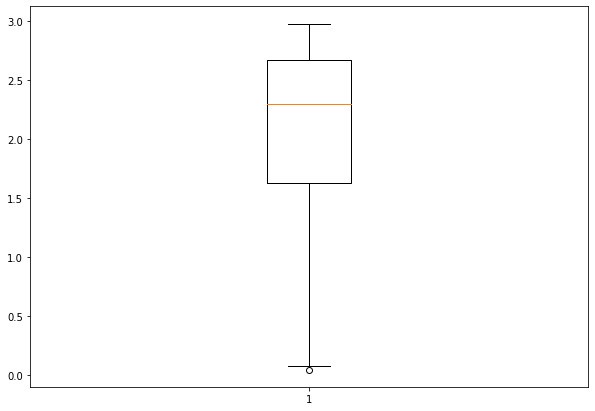

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(var_1)
plt.show()

In [ ]:
fig = px.box(var_1, points="all")
fig.show()

In [ ]:
print("VAR_1 - Valor máximo: " + str(var_1.max()))
print("VAR_1 - Valor mínimo: " + str(var_1.min()))
print("VAR_1 - Amplitude: " + str(var_1.max() - var_1.min()))

VAR_1 - Valor máximo: 2.98
VAR_1 - Valor mínimo: 0.05
VAR_1 - Amplitude: 2.93


Variância

In [ ]:
np.var(var_1)

0.5047448876

Desvio padrão

In [ ]:
stats.stdev(var_1)

0.7111655225056974

Medidas de assimetria e curtose

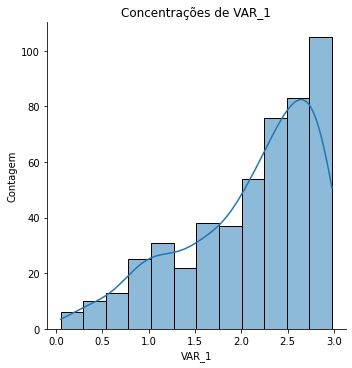

In [ ]:
sns.displot(var_1, kde=True).set(title='Concentrações de VAR_1', xlabel = 'VAR_1', ylabel='Contagem')

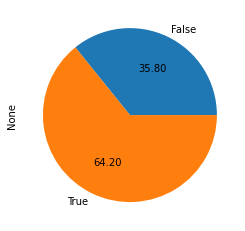

In [ ]:
# Quantidade de registros acima ou igual a 2.0
registros_prod.groupby(var_1 >= 2.0).size().plot(kind='pie', autopct='%.2f', )

Avaliando o tipo de distribuição que mais se encaixa

In [ ]:
get_common_distributions()

['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform']

In [ ]:
f = Fitter(var_1,
           distributions=['cauchy',
                        'chi2',
                        'expon',
                        'exponpow',
                        'gamma',
                        'lognorm',
                        'norm',
                        'powerlaw',
                        'rayleigh',
                        'beta',
                        'burr'
                        'uniform'])

Fitting 11 distributions: 100%|██████████| 11/11 [00:01<00:00,  9.15it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,3.064160,290.116693,-2528.773504,inf,0.064258,3.078469e-02
beta,3.186440,272.797678,-2502.993457,inf,0.052917,1.172992e-01
exponpow,4.208763,321.684835,-2370.075854,inf,0.063681,3.315704e-02
cauchy,6.251536,392.411451,-2178.461209,inf,0.185989,1.296252e-15
norm,6.780298,328.520294,-2137.864329,inf,0.117822,1.666540e-06


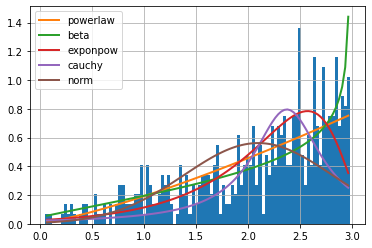

In [ ]:
f.fit()
f.summary()

In [ ]:
f.get_best(method = 'sumsquare_error')

{'powerlaw': {'a': 2.295467977722568,
  'loc': -0.052064519444405634,
  'scale': 3.0320645194918168}}

Distribuição escolhida pela biblioteca fitter: Powerlaw (Distribuição de lei de potência / distribuição de Pareto)

In [ ]:
results = powerlaw.Fit(var_1)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
32.13312669597133
2.8


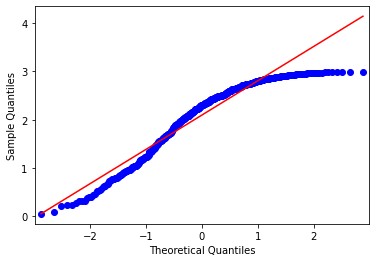

In [ ]:
sm.qqplot(var_1, line='s');

## Análise VAR_2 (variável qualitativa)

In [ ]:
registros_prod['VAR_2']

0      A
1      A
2      A
3      C
4      C
      ..
495    A
496    A
497    C
498    B
499    A
Name: VAR_2, Length: 500, dtype: object

Tabela de frequëncia

In [ ]:
var_2 = registros_prod['VAR_2']

In [ ]:
var_2.describe()

count     500
unique      3
top         C
freq      177
Name: VAR_2, dtype: object

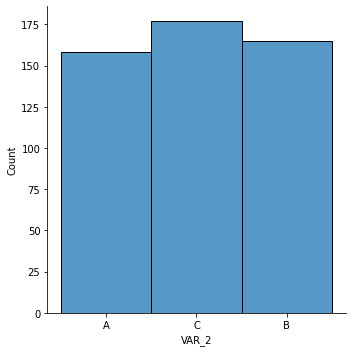

In [ ]:
sns.displot(var_2)

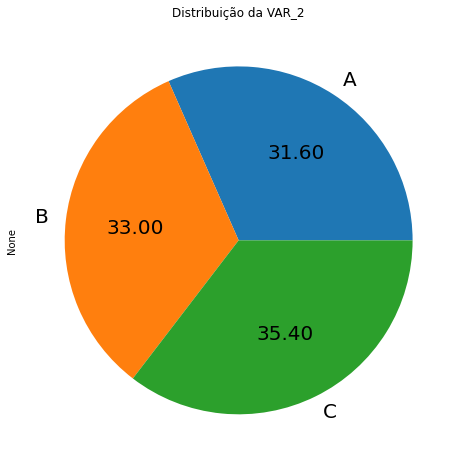

In [ ]:
registros_prod.groupby(var_2).size().plot(kind='pie', autopct='%.2f', title='Distribuição da VAR_2', figsize=(10,8), fontsize=20)

## Análise da variável peso_bombom

In [ ]:
registros_prod['PESO_BOMBOM']

0      10.144919
1      11.547027
2      11.112109
3       9.900123
4      10.079822
         ...    
495    10.471494
496    12.048504
497     6.128060
498     9.198321
499    12.686713
Name: PESO_BOMBOM, Length: 500, dtype: float64

In [ ]:
peso_bombom = registros_prod['PESO_BOMBOM']

In [ ]:
print("PESO_BOMBOM - Média: " + str(peso_bombom.mean()))
print("PESO_BOMBOM - Mediana: " + str(peso_bombom.median()))
print("PESO_BOMBOM - Moda: " + str(stats.mode(peso_bombom)))

PESO_BOMBOM - Média: 10.395001798876878
PESO_BOMBOM - Mediana: 10.33427286259615
PESO_BOMBOM - Moda: 10.1449193988029


In [ ]:
peso_bombom.describe(percentiles=[.1, .3, .5, .7, .9, 1])

count    500.000000
mean      10.395002
std        1.572233
min        4.543124
10%        8.404541
30%        9.619171
50%       10.334273
70%       11.168779
90%       12.343944
100%      17.362728
max       17.362728
Name: PESO_BOMBOM, dtype: float64

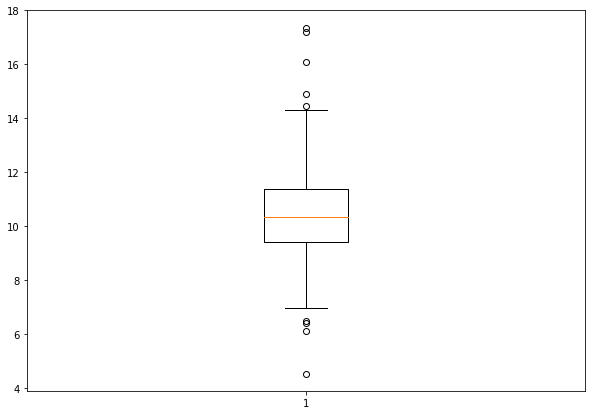

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(peso_bombom)
plt.show()

In [ ]:
fig = px.box(peso_bombom, points="all")
fig.show()

In [ ]:
# Bombons com menos de 9g são descartados e bombons acima de 11 geram custo maior

In [ ]:
registros_prod['PESO_BOMBOM'].loc[(registros_prod['PESO_BOMBOM'] < 9)].count()

83

In [ ]:
registros_prod['PESO_BOMBOM'].loc[(registros_prod['PESO_BOMBOM'] > 11)].count()

166

In [ ]:
registros_prod['PESO_BOMBOM'].loc[(registros_prod['PESO_BOMBOM'] > 9) & (registros_prod['PESO_BOMBOM'] <= 11)].count()

251

In [ ]:
registros_prod['PESO_BOMBOM'].count()

500

In [ ]:
registros_prod

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,grp
0,320.15,0.88,A,10.144919,9-11
1,320.14,1.55,A,11.547027,11+
2,284.85,2.97,A,11.112109,11+
3,263.92,2.36,C,9.900123,9-11
4,276.22,2.98,C,10.079822,9-11
...,...,...,...,...,...
495,301.01,1.59,A,10.471494,9-11
496,331.41,2.60,A,12.048504,11+
497,311.08,0.38,C,6.128060,0-8.9
498,315.56,1.89,B,9.198321,9-11


([<matplotlib.patches.Wedge at 0x7f2669201f70>,
 [Text(1.1485796865788287, 0.49321871779006937, '0 - 8.9'),
  Text(-0.8239331707903769, 0.8586233924552229, '9 - 11'),
  Text(0.4218059649031655, -1.1234232185477162, '11+')],
 [Text(0.6891478119472971, 0.2959312306740416, '12.9%'),
  Text(-0.47774276289526046, 0.4978572611715158, '48.5%'),
  Text(0.24605347952684656, -0.655330210819501, '38.6%')])

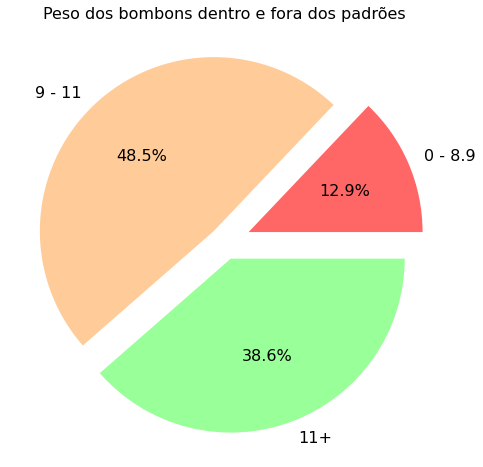

In [ ]:
labels = ['0 - 8.9','9 - 11','11+']
registros_prod['grp'] = pd.cut(registros_prod['PESO_BOMBOM'],
                   (0,9,11,20) ,
                   labels=labels)

explode = (0.15, 0.09, 0.1)
plt.title('Peso dos bombons dentro e fora dos padrões', fontsize = 16)
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.pie(registros_prod.groupby(['grp'])['PESO_BOMBOM'].sum(), labels=labels, autopct='%1.1f%%', explode=explode, textprops={'size': 16}, colors=['#ff6666', '#ffcc99', '#99ff99'])


In [ ]:
print("PESO_BOMBOM - Valor máximo: " + str(peso_bombom.max()))
print("PESO_BOMBOM - Valor mínimo: " + str(peso_bombom.min()))
print("PESO_BOMBOM - Amplitude: " + str(peso_bombom.max() - peso_bombom.min()))

PESO_BOMBOM - Valor máximo: 17.3627283203053
PESO_BOMBOM - Valor mínimo: 4.54312426922104
PESO_BOMBOM - Amplitude: 12.819604051084262


In [ ]:
stats.variance(peso_bombom)

2.471915505596019

In [ ]:
stats.stdev(peso_bombom)

1.5722326499586563

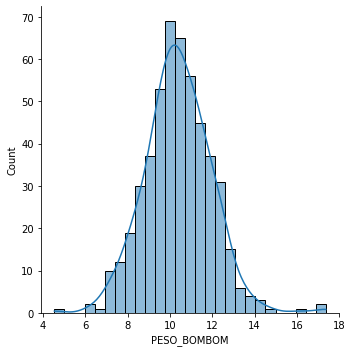

In [ ]:
sns.displot(peso_bombom, kde=True) # Curva leptocúrtica

# Análise Diagnóstica

## Correlações

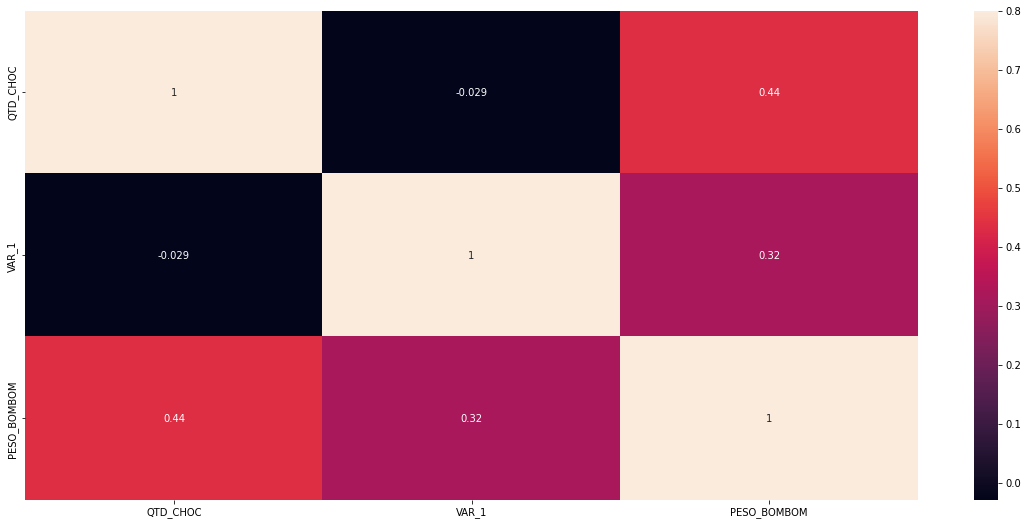

In [ ]:
corrm = registros_prod.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrm, vmax=.8, annot=True);

In [ ]:
rp_2 = pd.get_dummies(registros_prod, columns=['VAR_2'])

In [ ]:
rp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   PESO_BOMBOM  500 non-null    float64
 3   VAR_2_A      500 non-null    uint8  
 4   VAR_2_B      500 non-null    uint8  
 5   VAR_2_C      500 non-null    uint8  
dtypes: float64(3), uint8(3)
memory usage: 13.3 KB


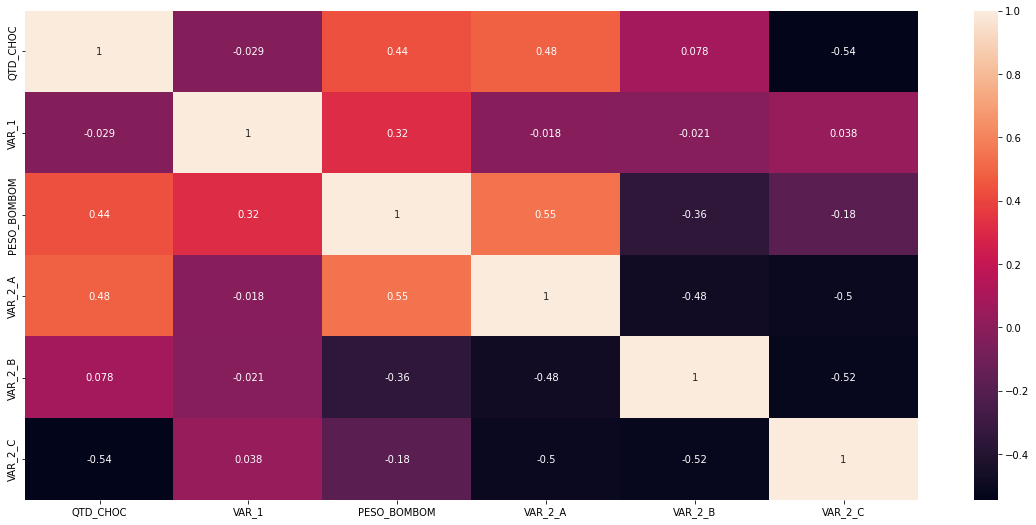

In [ ]:
corrm = rp_2.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrm, vmax=1, annot=True);
#Heatmap de correlações com variáveis categóricas (dummies)

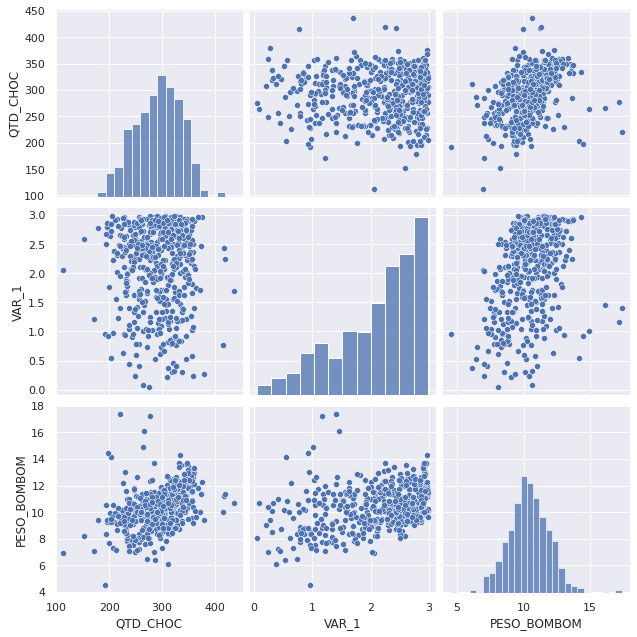

In [ ]:
sns.set()
cols = ['QTD_CHOC', 'VAR_1', 'PESO_BOMBOM', 'VAR_2']
sns.pairplot(registros_prod[cols], height = 3)
plt.show();

## QTD Choc e Peso do Bombom

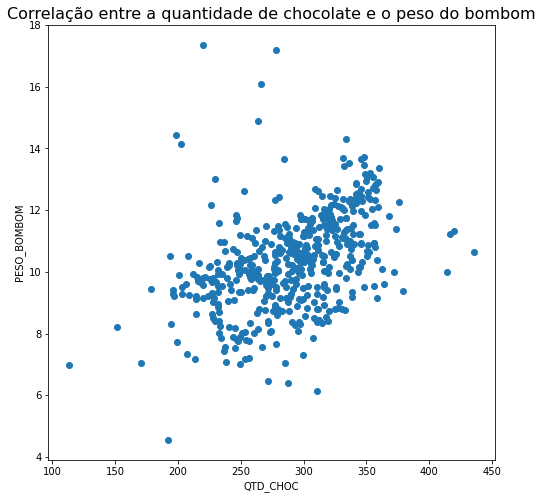

In [ ]:
plt.title('Correlação entre a quantidade de chocolate e o peso do bombom', fontsize = 16)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xlabel('QTD_CHOC')
plt.ylabel('PESO_BOMBOM')
plt.scatter(registros_prod['QTD_CHOC'], registros_prod['PESO_BOMBOM'], marker='o');

/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



Text(0.5, 1.0, 'Correlação entre a quantidade de chocolate e o peso do bombom')

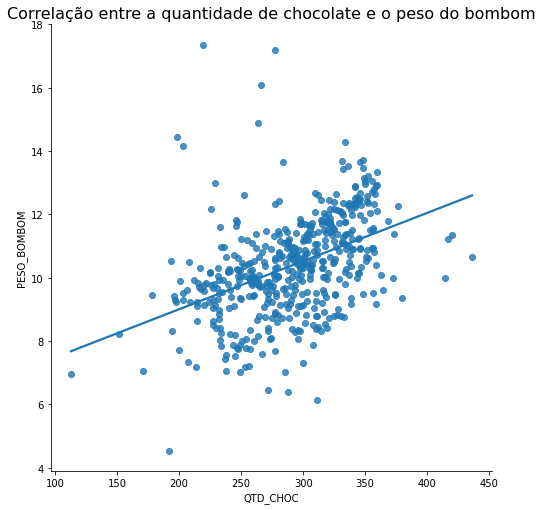

In [ ]:
sns.lmplot(x='QTD_CHOC', y='PESO_BOMBOM', data=registros_prod, ci=None, size=7)
ax = plt.gca()
ax.set_title('Correlação entre a quantidade de chocolate e o peso do bombom', fontsize=16)

In [ ]:
# Quanto mais chocolate, maior o peso do bombom

In [ ]:
fig = px.box(registros_prod.QTD_CHOC, points="all")
fig.show()

In [ ]:
df_peso_bom = registros_prod.loc[(registros_prod.PESO_BOMBOM >= 9) & (registros_prod.PESO_BOMBOM <= 11)] # Dataset de bombons com pesos ideais

In [ ]:
df_peso_ruim = registros_prod.loc[(registros_prod.PESO_BOMBOM < 9) | (registros_prod.PESO_BOMBOM > 11)] # Dataset de bombons com pesos ruins

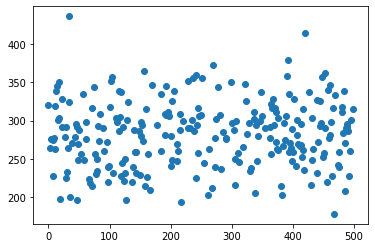

In [ ]:
# Gráfico da quantidade de chocolate com pesos bons
plt.scatter(df_peso_bom.index, df_peso_bom['QTD_CHOC'], marker='o');

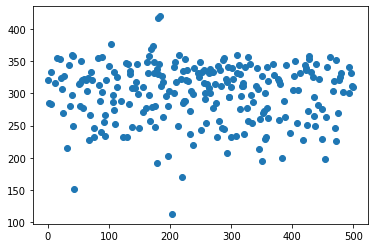

In [ ]:
# Gráfico da quantidade de chocolate com pesos ruins
plt.scatter(df_peso_ruim.index, df_peso_ruim['QTD_CHOC'], marker='o');

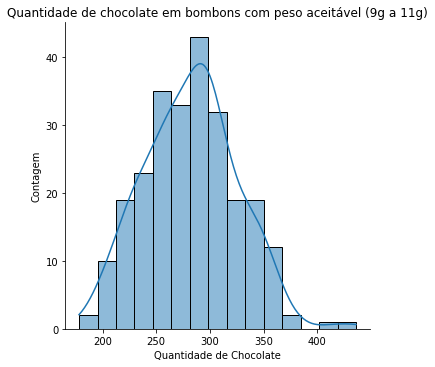

In [ ]:
# Gráfico da quantidade de chocolate com pesos bons
sns.displot(df_peso_bom['QTD_CHOC'], kde=True).set(title='Quantidade de chocolate em bombons com peso aceitável (9g a 11g)', xlabel = 'Quantidade de Chocolate', ylabel='Contagem')

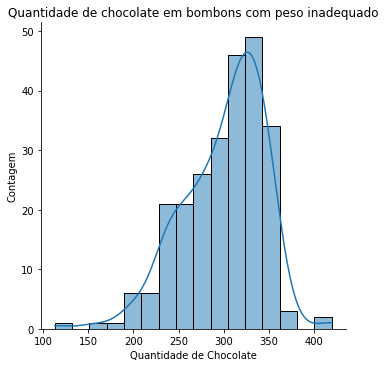

In [ ]:
# Gráfico da quantidade de chocolate com pesos ruins
sns.displot(df_peso_ruim['QTD_CHOC'], kde=True).set(title='Quantidade de chocolate em bombons com peso inadequado', xlabel = 'Quantidade de Chocolate', ylabel='Contagem')

## Var 2 e a QTD Choc

In [ ]:
col = np.where(registros_prod['VAR_2'] == 'A', 'g', np.where(registros_prod['VAR_2'] == 'B', 'b', 'r'))

In [ ]:
np.nanmean(registros_prod.QTD_CHOC)

291.2646

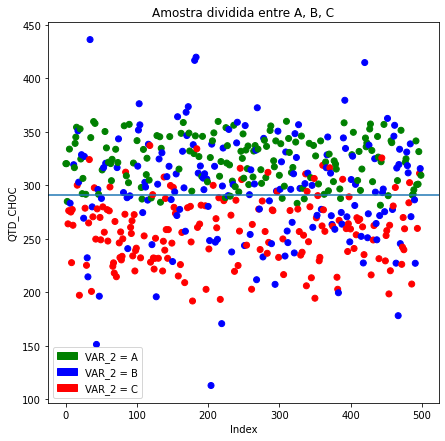

In [ ]:
# Gráfico que mostra a relação entre a qtd choc e a variável categórica var 2 (a, b, c)
pop_a = mpatches.Patch(color='green', label='VAR_2 = A')
pop_b = mpatches.Patch(color='blue', label='VAR_2 = B')
pop_c = mpatches.Patch(color='red', label='VAR_2 = C')
plt.legend(handles=[pop_a,pop_b,pop_c])
plt.title('Amostra dividida entre A, B, C')
plt.xlabel('Index')
plt.ylabel('QTD_CHOC')
plt.axhline(y=np.nanmean(registros_prod.QTD_CHOC))
plt.rcParams['figure.figsize'] = [6, 6]
plt.scatter(registros_prod.index, registros_prod['QTD_CHOC'], marker='o', c=col);
# VAR A - Verde
# VAR B - Azul
# VAR C - Vermelho

In [ ]:
dfAbaixoMediaQtdChoc = registros_prod.loc[(registros_prod['QTD_CHOC'] < np.nanmean(registros_prod.QTD_CHOC))]

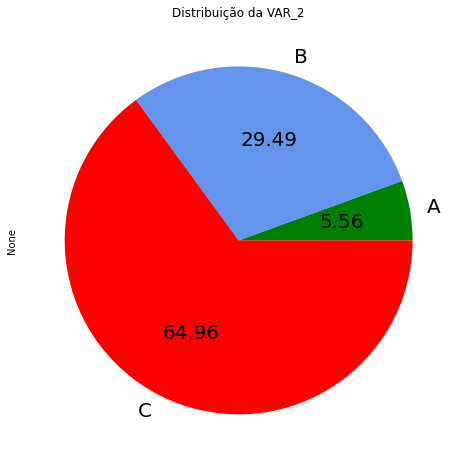

In [ ]:
colors = ['green','cornflowerblue','red']
dfAbaixoMediaQtdChoc.groupby(dfAbaixoMediaQtdChoc['VAR_2']).size().plot(kind='pie', autopct='%.2f', title='Distribuição da VAR_2', figsize=(10,8), fontsize=20, colors=colors)

In [ ]:
dfAC = registros_prod.loc[(registros_prod['VAR_2'] == 'A') | (registros_prod['VAR_2'] == 'C')]

In [ ]:
## Abaixo: analisando a média das variáveis do dataset dividindo pelas variável categórica

In [ ]:
dfA = registros_prod.loc[(registros_prod['VAR_2'] == 'A')]

In [ ]:
dfA.mean()

<ipython-input-143-cf96cd988e79>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



QTD_CHOC       323.223608
VAR_1            2.079177
PESO_BOMBOM     11.659115
dtype: float64

In [ ]:
dfB = registros_prod.loc[(registros_prod['VAR_2'] == 'B')] # A variável B parece diminuir o peso do bombom, pois mesmo a qtd de choc em var C tendo média menor, o peso do bombom é maior.

In [ ]:
dfB.mean()

<ipython-input-148-294c28cf7669>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



QTD_CHOC       296.256485
VAR_1            2.077394
PESO_BOMBOM      9.595768
dtype: float64

In [ ]:
dfC = registros_prod.loc[(registros_prod['VAR_2'] == 'C')]

In [ ]:
dfC.mean()

<ipython-input-150-3e0833535b28>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



QTD_CHOC       258.082768
VAR_1            2.134520
PESO_BOMBOM     10.011633
dtype: float64

In [ ]:
col = np.where(df_peso_bom['VAR_2'] == 'A', 'g', np.where(df_peso_bom['VAR_2'] == 'B', 'b', 'r'))

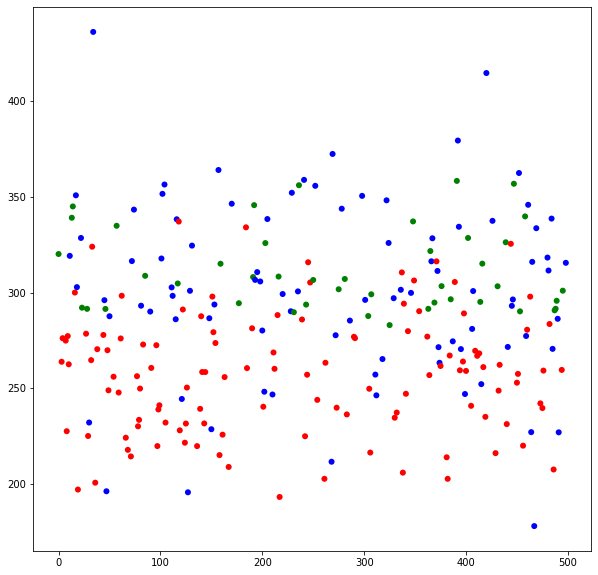

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_peso_bom.index, df_peso_bom['QTD_CHOC'], c=col, linewidth=0) #
plt.show()
# VAR A - Verde
# VAR B - Azul
# VAR C - Vermelho

## Var 2 e peso do bombom
Obs.: Visto que a VAR 2 depende da QTD_CHOC, podemos dizer que há uma multicolinearidade. Sendo assim, não incluir a relação entre VAR_2 e PESO_BOMBOM na apresentação.

In [ ]:
registros_prod.loc[registros_prod.VAR_2 == 'A']

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
5,333.76,2.00,A,11.754616
12,316.43,2.96,A,12.049646
...,...,...,...,...
492,341.39,2.48,A,12.399139
493,300.53,2.59,A,11.177973
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504


In [ ]:
registros_prod.loc[registros_prod.VAR_2 == 'A'].PESO_BOMBOM.mean()

11.659114787814763

In [ ]:
dfA = registros_prod.loc[registros_prod.VAR_2 == 'A']

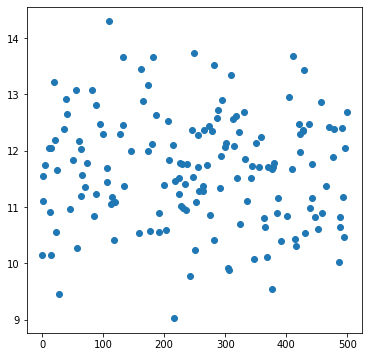

In [ ]:
plt.scatter(dfA.index, dfA['PESO_BOMBOM'], marker='o');

In [ ]:
dfA['QTD_CHOC'].min()

281.32

In [ ]:
dfA['QTD_CHOC'].max()

359.71

In [ ]:
registros_prod.loc[registros_prod.VAR_2 == 'B'].PESO_BOMBOM.mean()

9.595767995983538

In [ ]:
dfB = registros_prod.loc[registros_prod.VAR_2 == 'B']

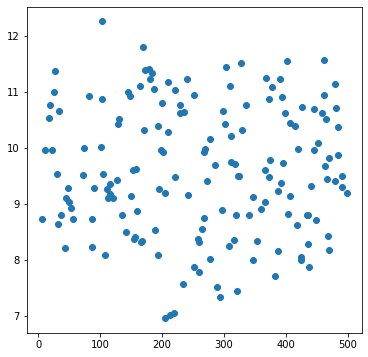

In [ ]:
plt.scatter(dfB.index,dfB['PESO_BOMBOM'], marker='o');

In [ ]:
registros_prod.loc[registros_prod.VAR_2 == 'C'].PESO_BOMBOM.mean()

10.01163301483854

In [ ]:
fig = px.box(dfC['QTD_CHOC'], points="all")
fig.show()

In [ ]:
fig = px.box(dfB['QTD_CHOC'], points="all")
fig.show()

In [ ]:
dfC = registros_prod.loc[registros_prod.VAR_2 == 'C']

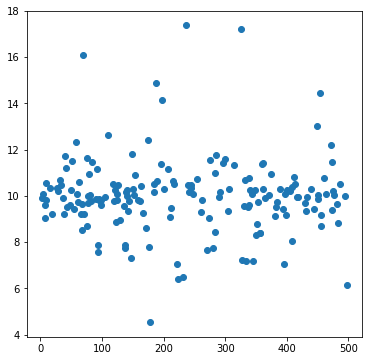

In [ ]:
plt.scatter(dfC.index, dfC['PESO_BOMBOM'], marker='o');

In [ ]:
col = np.where(registros_prod['VAR_2'] == 'A', 'r', np.where(registros_prod['VAR_2'] == 'B', 'g', 'b'))

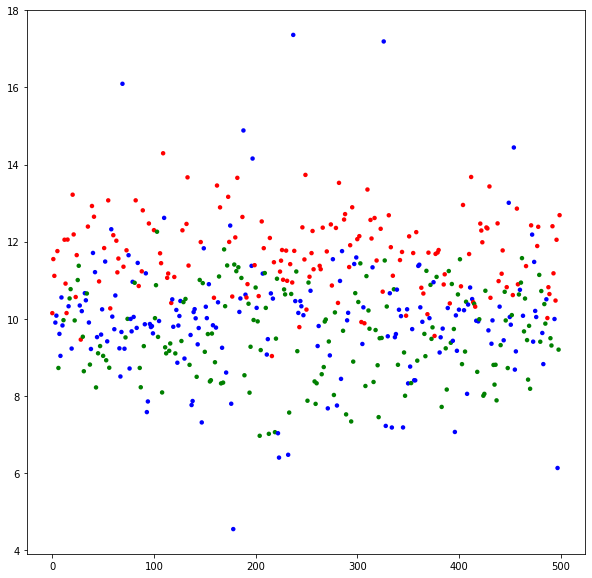

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(registros_prod.index, registros_prod['PESO_BOMBOM'], c=col, s=20, linewidth=0)
plt.show()
# VAR A - Vermelho
# VAR B - Verde
# VAR C - Azul

In [ ]:
col = np.where(df_peso_bom['VAR_2'] == 'A', 'r', np.where(df_peso_bom['VAR_2'] == 'B', 'g', 'b'))

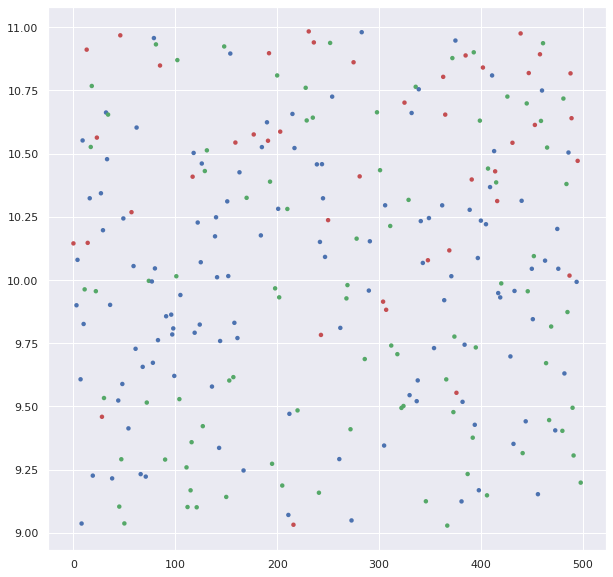

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_peso_bom.index, df_peso_bom['PESO_BOMBOM'], c=col, s=20, linewidth=0)
plt.show()
# VAR A - Vermelho
# VAR B - Verde
# VAR C - Azul

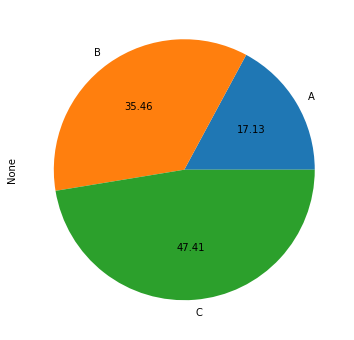

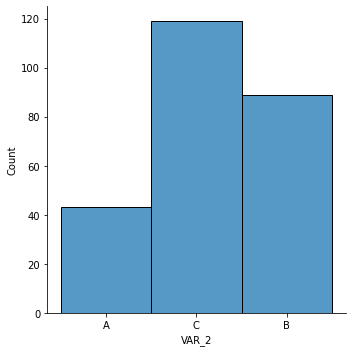

In [ ]:
df_peso_bom.groupby('VAR_2').size().plot(kind='pie', autopct='%.2f') # Bater cores no scatter plot e do pie chart
sns.displot(df_peso_bom['VAR_2'])

VAR 2 e a QTD_CHOC

In [ ]:
df_dummies = pd.get_dummies(registros_prod)

In [ ]:
df_dummies

,QTD_CHOC,VAR_1,PESO_BOMBOM,VAR_2_A,VAR_2_B,VAR_2_C
0,320.15,0.88,10.144919,1,0,0
1,320.14,1.55,11.547027,1,0,0
2,284.85,2.97,11.112109,1,0,0
3,263.92,2.36,9.900123,0,0,1
4,276.22,2.98,10.079822,0,0,1
...,...,...,...,...,...,...
495,301.01,1.59,10.471494,1,0,0
496,331.41,2.60,12.048504,1,0,0
497,311.08,0.38,6.128060,0,0,1
498,315.56,1.89,9.198321,0,1,0


In [ ]:
np.nanmean(df_dummies['QTD_CHOC'])

291.2646

In [ ]:
col = np.where(registros_prod['VAR_2'] == 'A', 'r', np.where(registros_prod['VAR_2'] == 'B', 'g', 'b'))

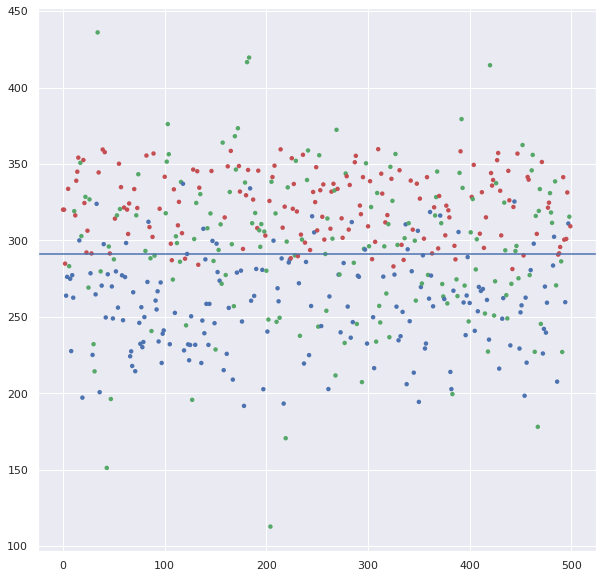

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_dummies.index, df_dummies['QTD_CHOC'], c=col, s=20, linewidth=0)
plt.axhline(y=np.nanmean(df_dummies['QTD_CHOC']))
plt.show()
# Quando a QTD CHOC é maior que aprox. 270, a var_2 == A começa a ser verdade

In [ ]:
dfQtdChocMean = registros_prod.loc[registros_prod['QTD_CHOC'] >= np.nanmean(registros_prod['QTD_CHOC'])]

In [ ]:
dfQtdChocMean

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
5,333.76,2.00,A,11.754616
11,319.19,2.34,B,9.963041
12,316.43,2.96,A,12.049646
...,...,...,...,...
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321


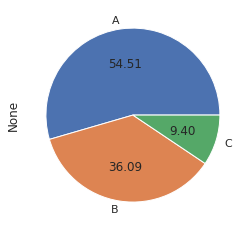

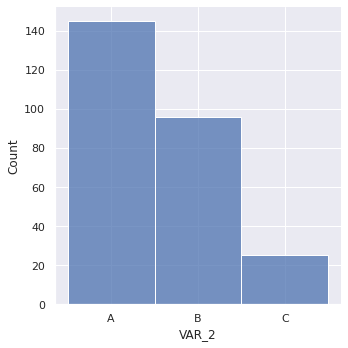

In [ ]:
dfQtdChocMean.groupby('VAR_2').size().plot(kind='pie', autopct='%.2f')
sns.displot(dfQtdChocMean['VAR_2'])
# Descobrindo a QTD de amostras de cada VAR 2 acima de QTD_CHOC > 291

In [ ]:
dfQtdChocMean2 = registros_prod.loc[registros_prod['QTD_CHOC'] <= np.nanmean(registros_prod['QTD_CHOC'])]

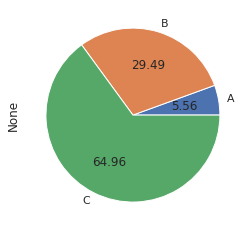

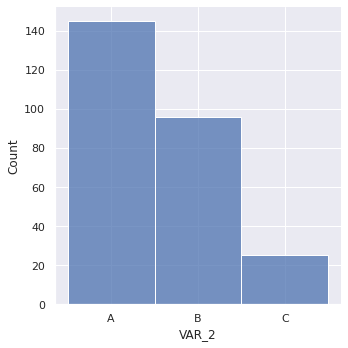

In [ ]:
dfQtdChocMean2.groupby('VAR_2').size().plot(kind='pie', autopct='%.2f')
sns.displot(dfQtdChocMean['VAR_2'])
# Abaixo da qtd_choc média, a VAR_2 que mais aparece é C

## Var 1 e o peso do bombom

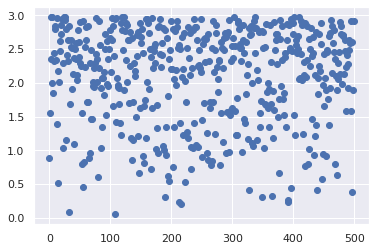

In [ ]:
plt.scatter(registros_prod.index, registros_prod['VAR_1'], marker='o');

Text(0.5, 1.0, 'Correlação entre a VAR_1 e o peso do bombom')

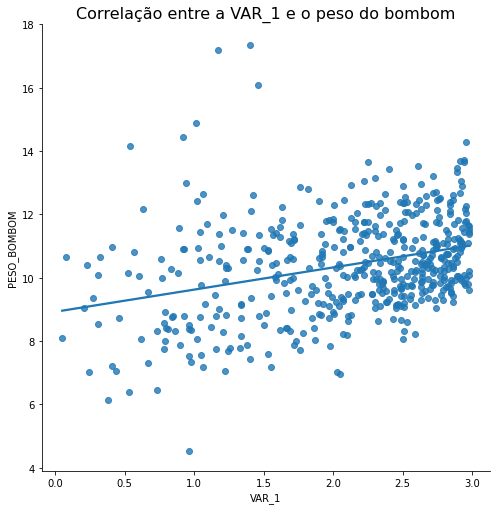

In [ ]:
sns.lmplot(x='VAR_1', y='PESO_BOMBOM', data=registros_prod, ci=None, height=7)
ax = plt.gca()
ax.set_title('Correlação entre a VAR_1 e o peso do bombom', fontsize=16)

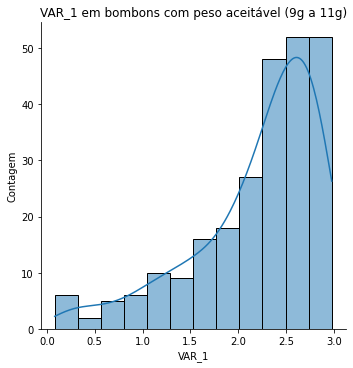

In [ ]:
# Gráfico da quantidade de chocolate com pesos bons
sns.displot(df_peso_bom['VAR_1'], kde=True).set(title='VAR_1 em bombons com peso aceitável (9g a 11g)', xlabel = 'VAR_1', ylabel='Contagem')

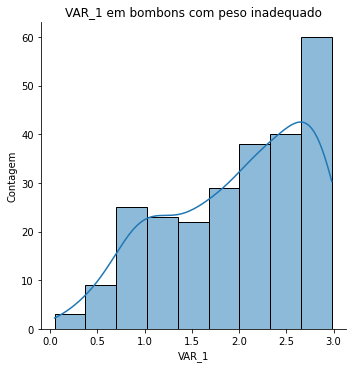

In [ ]:
# Gráfico da quantidade de chocolate com pesos ruins
sns.displot(df_peso_ruim['VAR_1'], kde=True).set(title='VAR_1 em bombons com peso inadequado', xlabel = 'VAR_1', ylabel='Contagem')

In [ ]:
col = np.where(registros_prod['VAR_1'] <= 2, 'r', 'b') # Trocar cores

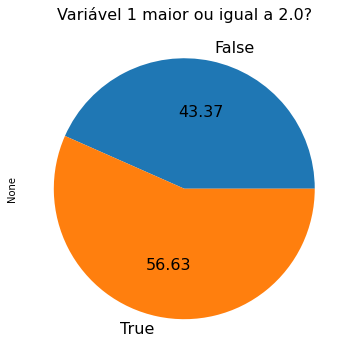

In [ ]:
plt.title('Variável 1 maior ou igual a 2.0?', fontsize = 16)
registros_prod.groupby(df_peso_ruim['VAR_1'] >= 2.0).size().plot(kind='pie', autopct='%.2f', textprops={'size': 16})

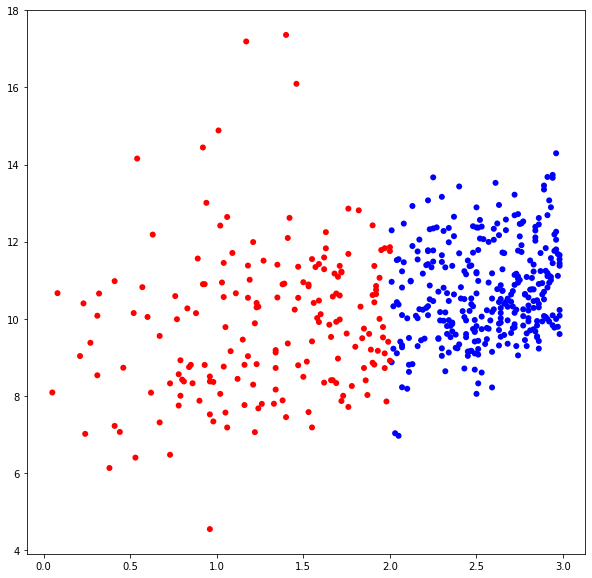

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(registros_prod['VAR_1'], registros_prod['PESO_BOMBOM'], c=col, linewidth=0) # Entendendo o efeito da variável 1
plt.show()
# VAR 1 <= 1.65 - vermelho
# VAR B >= 2.25 - verde
# VAR C - entre os valores acima

In [ ]:
col = np.where(registros_prod['PESO_BOMBOM'] >= 10, 'r','g')

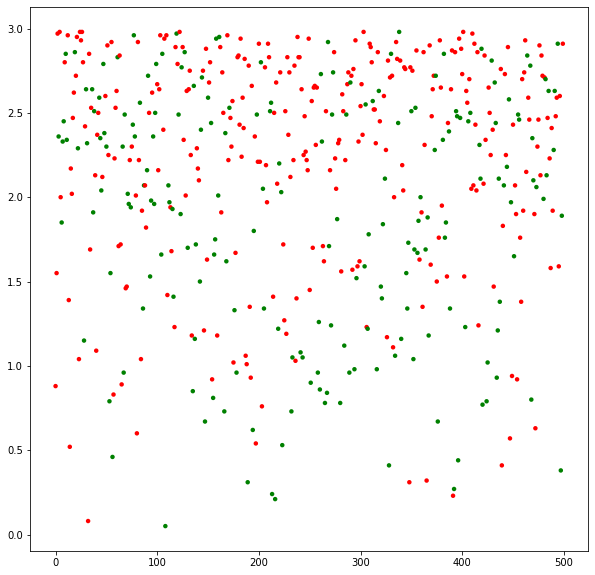

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(registros_prod.index, registros_prod['VAR_1'], c=col, s=20, linewidth=0)
plt.show()
# Peso do bombom maior ou igual a 10 - Vermelho
# Menor que 10 - Verde

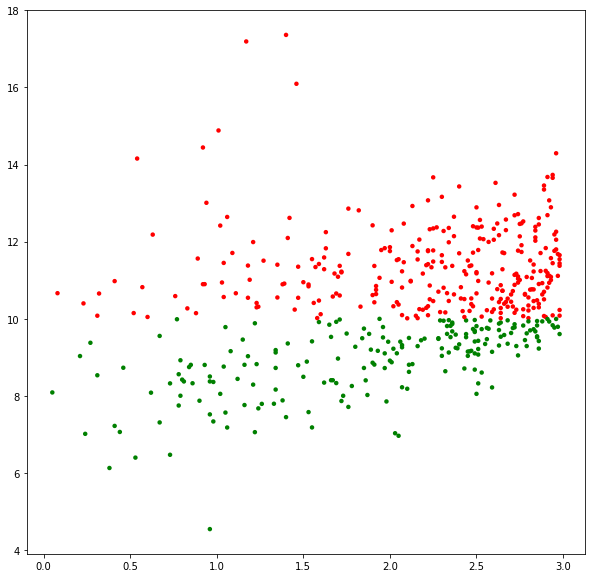

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(registros_prod['VAR_1'], registros_prod['PESO_BOMBOM'], c=col, s=20, linewidth=0)
plt.show()
# Peso do bombom maior ou igual a 10 - Vermelho
# Menor que 10 - Verde

In [ ]:
col = np.where(df_peso_bom['PESO_BOMBOM'] >= 10, 'r','g')

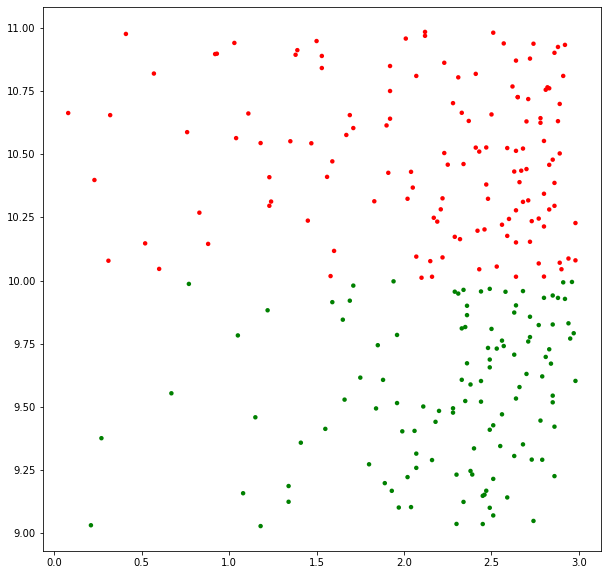

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df_peso_bom['VAR_1'], df_peso_bom['PESO_BOMBOM'], c=col, s=20, linewidth=0)
plt.show()
# Peso do bombom maior ou igual a 10 - Vermelho
# Menor que 10 - Verde

# Análise Preditiva

In [ ]:
analise_preditiva.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,286.63,2.72,A,NaN
1,257.27,1.97,B,NaN
2,353.16,2.64,A,NaN
3,317.78,2.76,A,NaN
4,248.10,2.63,C,NaN


In [ ]:
analise_preditiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     50 non-null     float64
 1   VAR_1        50 non-null     float64
 2   VAR_2        50 non-null     object 
 3   PESO_BOMBOM  0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [ ]:
registros_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
df = pd.get_dummies(registros_prod)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   PESO_BOMBOM  500 non-null    float64
 3   VAR_2_A      500 non-null    uint8  
 4   VAR_2_B      500 non-null    uint8  
 5   VAR_2_C      500 non-null    uint8  
dtypes: float64(3), uint8(3)
memory usage: 13.3 KB


In [ ]:
df.index

RangeIndex(start=0, stop=500, step=1)

Variável dependente: PESO_BOMBOM <br>
Variáveis explicativas: QTD_CHOC, VAR_1, VAR_2

In [ ]:
# Iniciando modelagem

In [ ]:
X = df.copy().drop('PESO_BOMBOM', axis=1)# Pegando as variáveis explicativas
y = df['PESO_BOMBOM'] # Salvando a variável dependente

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state= 1)    # Separando em treino/teste

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape # Verificando a forma do treino e teste

((350, 5), (150, 5), (350,), (150,))

In [ ]:
# Função para verificar a performance (Cross Validation)

n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [ ]:
lr = LinearRegression() # Criando modelo

In [ ]:
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

rmse on train 1.0345991586415586
rmse on train 1.2777914967799398


In [ ]:
# Vendo valores reais e valores previstos pelo modelo
dfResult = pd.DataFrame({'Valor real': y_test, 'Resultado do modelo': test_pre})
dfResult

,Valor real,Resultado do modelo
304,9.914430,10.799942
340,8.804980,9.062730
47,9.290839,8.970425
67,8.501684,8.578332
479,11.137029,10.542258
...,...,...
331,12.683729,12.402305
197,14.155600,7.944728
95,12.470873,12.018226
122,10.227491,10.955983


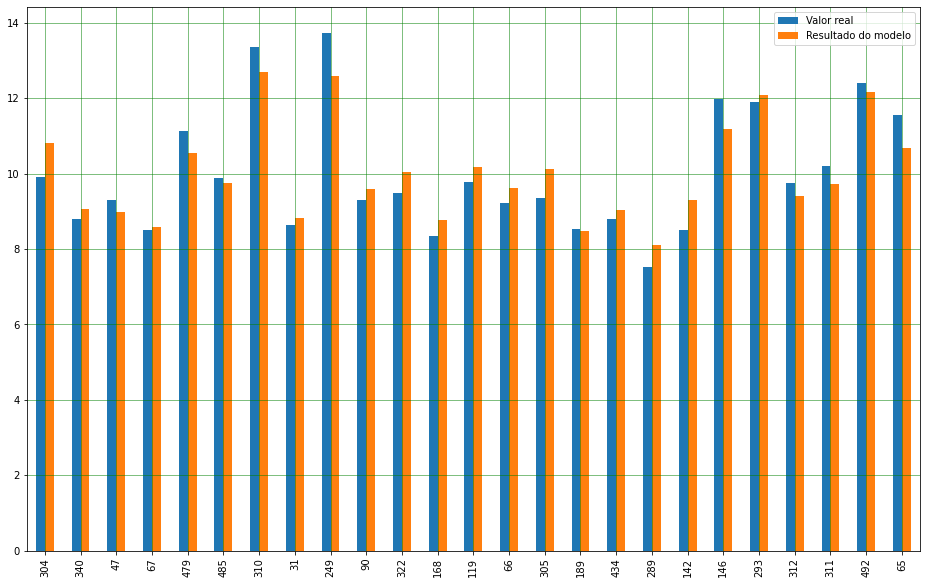

In [ ]:
df1 = dfResult.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

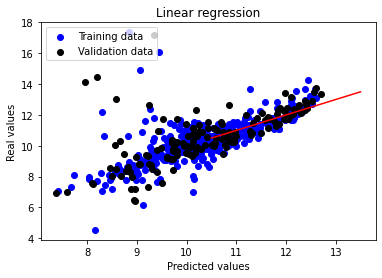

In [ ]:
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
output = pd.get_dummies(analise_preditiva).drop('PESO_BOMBOM', axis=1)

In [ ]:
output.head()

,QTD_CHOC,VAR_1,VAR_2_A,VAR_2_B,VAR_2_C
0,286.63,2.72,1,0,0
1,257.27,1.97,0,1,0
2,353.16,2.64,1,0,0
3,317.78,2.76,1,0,0
4,248.10,2.63,0,0,1


In [ ]:
final_df = lr.predict(output)
analise_preditiva['PESO_BOMBOM']=final_df[:]
analise_preditiva.to_csv(r'/content/bombom/output_analise_preditiva.csv',columns=['PESO_BOMBOM'])

# Análise Prescritiva

## LinearRegression

In [ ]:
# Função para verificar a performance (Cross Validation)

n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(df.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [ ]:
df = pd.get_dummies(registros_prod)

In [ ]:
analise_prescritiva.head()

,QTD_CHOC,VAR_1,VAR_2
0,NaN,2.07,C
1,NaN,2.94,B
2,NaN,2.53,B
3,NaN,2.19,B
4,NaN,2.02,C


Variável dependente = QTD_CHOC <br>
Variável explicativa = VAR_1 e VAR_2

In [ ]:
X = df.copy().drop('QTD_CHOC', axis=1)# Pegando as variáveis explicativas
y = df['QTD_CHOC'] # Salvando a variável dependente

In [ ]:
X = X.copy().drop('PESO_BOMBOM', axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state=1)    # Separando em treino/teste

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape # Verificando a forma do treino e teste

((375, 4), (125, 4), (375,), (125,))

In [ ]:
lrP = LinearRegression() # Criando modelo

In [ ]:
lrP.fit(X_train, y_train)
print('rmse on train',rmse_CV_train(lrP).mean())
print('rmse on train',rmse_CV_test(lrP).mean())

rmse on train 36.16346078969808
rmse on train 36.80013139116387


In [ ]:
test_prep = lrP.predict(X_test)
train_prep = lrP.predict(X_train)

In [ ]:
# Vendo valores reais e valores previstos pelo modelo
dfResultp = pd.DataFrame({'Actual': y_test, 'Predicted': test_prep})
dfResultp

,Actual,Predicted
304,287.78,321.447352
340,311.31,296.254822
47,196.33,298.269421
67,227.51,255.341652
479,330.98,298.182904
...,...,...
469,333.62,297.725603
41,357.75,322.411393
159,315.08,320.940613
286,285.41,297.898636


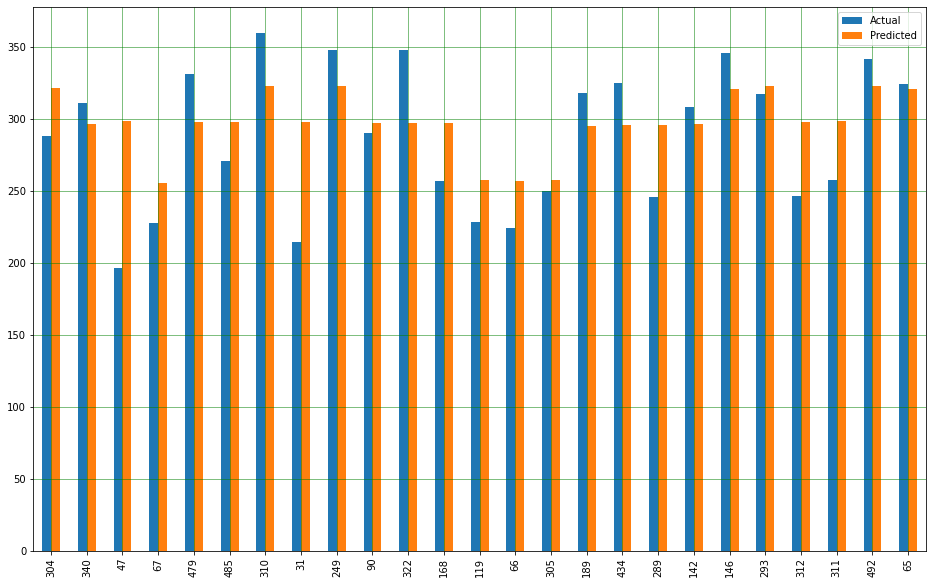

In [ ]:
df1p = dfResultp.head(25)
df1p.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

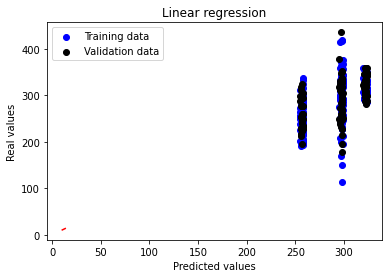

In [ ]:
# Considerar usar outro modelo!!!
plt.scatter(train_prep, y_train, c = "blue",  label = "Training data")
plt.scatter(test_prep, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
output = pd.get_dummies(analise_preditiva).drop('QTD_CHOC', axis=1)

In [ ]:
final_df = lr.predict(output)
analise_preditiva['QTD_CHOC']=final_df[:]
analise_preditiva.to_csv(r'/content/bombom/analise_prescritiva_1.csv',columns=['QTD_CHOC'])

## RandomForest

In [ ]:
Xr = df.copy().drop('QTD_CHOC', axis=1) # Pegando as variáveis explicativas
Xr = Xr.copy().drop('PESO_BOMBOM', axis=1) # Droppando a feature PESO_BOMBOM
yr = df['QTD_CHOC'] # Salvando a variável dependente

In [ ]:
Xr_train,Xr_test,yr_train,yr_test = train_test_split(Xr, yr, test_size = 0.25,random_state= 1)    # Separando em treino/teste

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 2, random_state = 1)
# Train the model on training data
rf.fit(Xr_train, yr_train);

In [ ]:
predictions = rf.predict(Xr_test)
predictions = rf.predict(Xr_test)
# Calculate the absolute errors
errors = abs(predictions - yr_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 35.53


In [ ]:
test_preR = rf.predict(Xr_test)
train_preR = rf.predict(Xr_train)

In [ ]:
# Vendo valores reais e valores previstos pelo modelo
dfResultp = pd.DataFrame({'Actual': yr_test, 'Predicted': test_preR})
dfResultp

,Actual,Predicted
304,287.78,290.76000
340,311.31,328.37000
47,196.33,274.46500
67,227.51,213.96250
479,330.98,311.31000
...,...,...
469,333.62,352.12000
41,357.75,318.33500
159,315.08,335.74000
286,285.41,298.16375


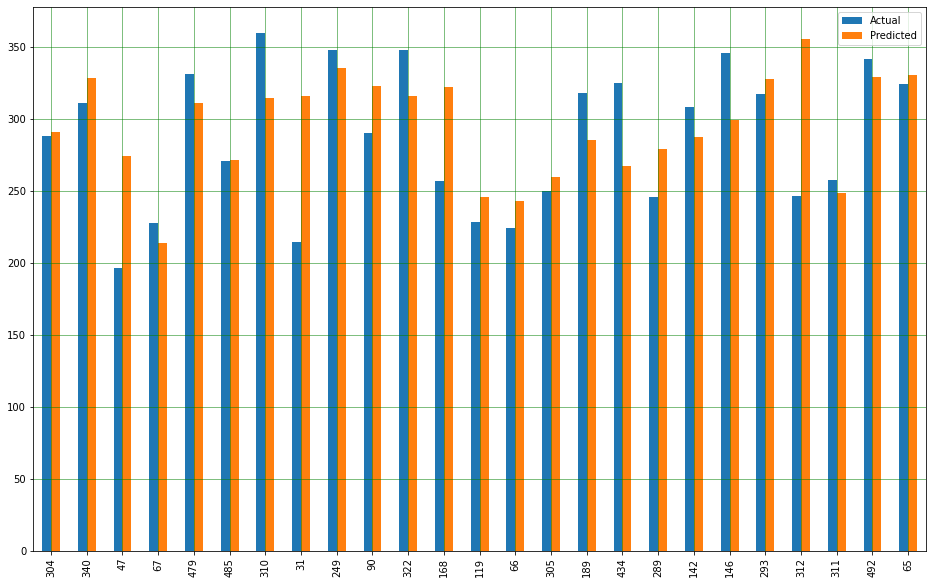

In [ ]:
df1p = dfResultp.head(25)
df1p.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

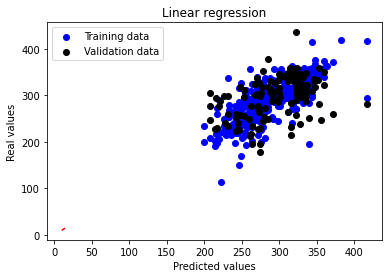

In [ ]:
plt.scatter(train_preR, yr_train, c = "blue",  label = "Training data")
plt.scatter(test_preR, yr_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

## XGBoost (escolhido)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
Xgb = df.copy().drop('QTD_CHOC', axis=1) # Pegando as variáveis explicativas
Xgb = Xgb.copy().drop('PESO_BOMBOM', axis=1) # Droppando a feature PESO_BOMBOM
ygb = df['QTD_CHOC'] # Salvando a variável dependente

In [ ]:
Xgb_train,Xgb_test,ygb_train,ygb_test = train_test_split(Xgb, ygb, test_size = 0.25,random_state= 1)    # Separando em treino/teste

In [ ]:
model = XGBRegressor(max_depth=1)

In [ ]:
model.fit(Xgb_train, ygb_train, verbose=False)

[13:20:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=1)

In [ ]:
predictions = model.predict(Xgb_test)
print("Erro Médio Absoluto: {:.2f}".format(mean_absolute_error(predictions, ygb_test)))

Erro Médio Absoluto: 29.47


In [ ]:
# Vendo valores reais e valores previstos pelo modelo
dfResultXGB = pd.DataFrame({'Valor real': ygb_test, 'Previsão': predictions})
dfResultXGB

,Valor real,Previsão
304,287.78,316.239655
340,311.31,293.267334
47,196.33,299.646423
67,227.51,253.005493
479,330.98,299.646423
...,...,...
469,333.62,300.646942
41,357.75,323.619263
159,315.08,316.239655
286,285.41,300.646942


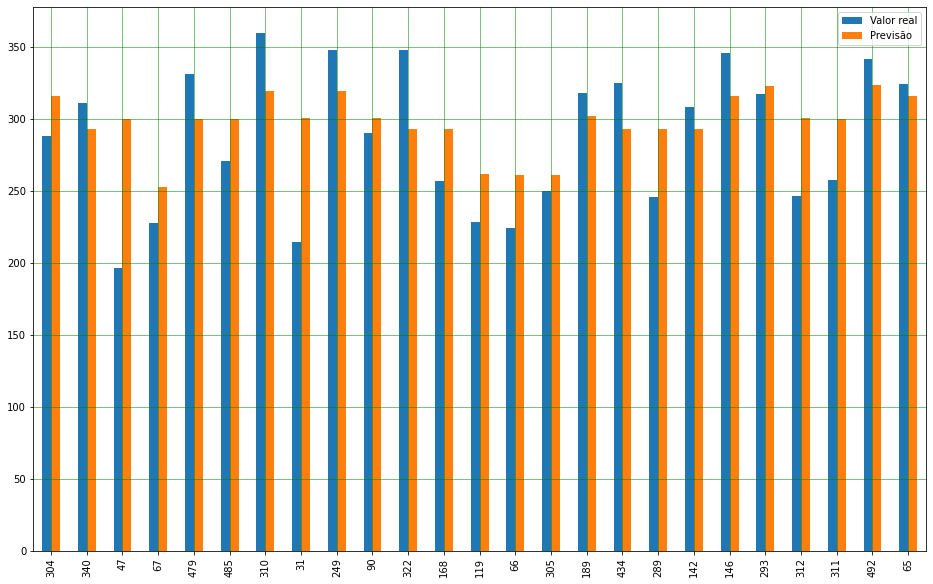

In [ ]:
df1p = dfResultXGB.head(25)
df1p.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
train_preGB = model.predict(Xgb_train)

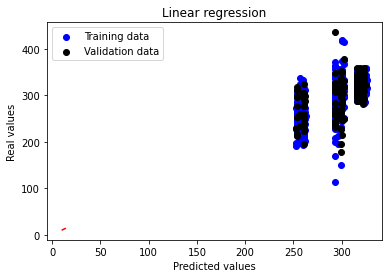

In [ ]:
plt.scatter(train_preGB, ygb_train, c = "blue",  label = "Training data")
plt.scatter(predictions, ygb_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [ ]:
output = pd.get_dummies(analise_prescritiva).drop('QTD_CHOC', axis=1)

In [ ]:
final_df = model.predict(output)
analise_preditiva['QTD_CHOC']=final_df[:]
analise_preditiva.to_csv(r'/content/bombom/output_analise_prescritiva.csv',columns=['QTD_CHOC'])